In [1]:
import forestci as fci
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import time
import numpy as np
import copy
#import calib

In [2]:
d = pd.read_csv('data1.csv')

In [3]:
y = d['total_price_including_optional_support']
x = d[['students_reached','funding_status', 'duration','essayave']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3,
                                                   random_state=42)

In [5]:
t1 = time.time()
# create RandomForestRegressor
n_trees = 1000
forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
forest.fit(X_train, y_train)
y_hat = forest.predict(X_test)
t2 = time.time()
print("Training ", t2-t1)
inbag = fci.calc_inbag(X_train.shape[0], forest)
V_IJ_unbiased = fci.random_forest_error(forest,X_train, X_test, calibrate=False)
t3 = time.time()
print("Calculating CI ", t3-t2)
V_IJ_calibrated = fci.random_forest_error(forest,X_train, X_test, calibrate=True)
t4 = time.time()
print("Calculating Calibrated CI ", t4-t3)

Training  1.461683988571167
Calculating CI  1.0874090194702148
Calculating Calibrated CI  11.198307991027832


In [6]:
V_IJ_calibrated 

[47318.284713753907,
 26979.899467737527,
 73233.320960875382,
 71545.460511408615,
 832432.39382981497,
 29846.906620522881,
 443168.15606757096,
 546877.47632706887,
 26979.899467737527,
 28154.880221093459,
 26979.899467737527,
 28339.594883079688,
 33000.765984286867,
 26979.899467737527,
 33000.765984286867,
 33000.765984286867,
 29479.665948286794,
 33000.765984286867,
 26979.899467737527,
 40901.919258222209,
 47318.284713753907,
 117755.23374596656,
 47318.284713753907,
 47318.284713753907,
 35031.945772390005,
 31394.506197587594,
 28339.594883079688,
 33000.765984286867,
 26979.899467737527,
 32346.468818730697,
 40901.919258222209,
 26802.368793901867,
 33000.765984286867,
 30650.569469595201,
 26926.619540703414,
 231397.22505774407,
 27384.246793249498,
 39684.804277351395,
 33000.765984286867,
 33470.63215226082,
 29479.665948286794,
 29841.302799900808,
 29479.665948286794,
 33000.765984286867,
 40901.919258222209,
 31394.506197587594,
 26979.899467737527,
 33000.7659842

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<Container object of 3 artists>

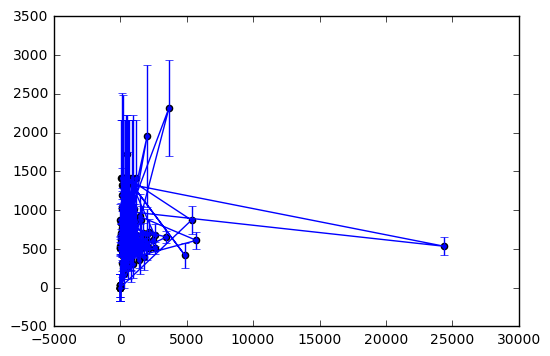

In [18]:
plt.scatter(y_test, y_hat)
plt.errorbar(y_test, y_hat, np.sqrt(V_IJ_unbiased))

<Container object of 3 artists>

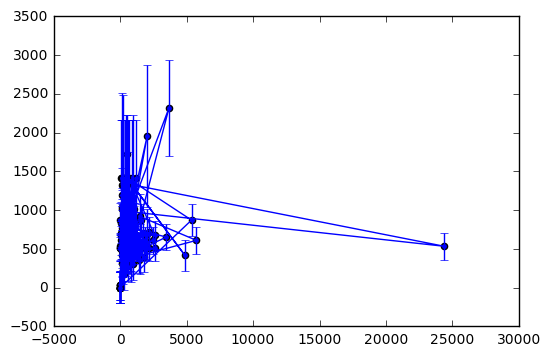

In [19]:
plt.scatter(y_test, y_hat)
plt.errorbar(y_test, y_hat, np.sqrt(V_IJ_calibrated))

In [9]:
"""
calibration_ratio = 2
n_sample = np.ceil(n_trees / calibration_ratio)
new_forest = copy.deepcopy(forest)
new_forest.estimators_ = np.random.permutation(new_forest.estimators_)[:int(n_sample)]
new_forest.n_estimators = int(n_sample)
results_ss = fci.random_forest_error(new_forest, X_train, X_test, calibrate=False)
"""